In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/kaggle/input/water-quality-monitoring-dataset/brisbane_water_quality.csv")

In [3]:
df.head()

,Timestamp,Record number,Average Water Speed,Average Water Direction,Chlorophyll,Chlorophyll [quality],Temperature,Temperature [quality],Dissolved Oxygen,Dissolved Oxygen [quality],Dissolved Oxygen (%Saturation),Dissolved Oxygen (%Saturation) [quality],pH,pH [quality],Salinity,Salinity [quality],Specific Conductance,Specific Conductance [quality],Turbidity,Turbidity [quality]
0,2023-08-04 23:00:00,1468,4.834,73.484,1.621,NaN,20.018,NaN,7.472,NaN,101.175,NaN,8.176,NaN,35.215,NaN,53.262,NaN,2.068,NaN
1,2023-08-04 23:30:00,1469,2.544,106.424,1.959,NaN,19.986,NaN,7.455,NaN,100.884,NaN,8.175,NaN,35.209,NaN,53.254,NaN,1.994,NaN
2,2023-08-04 23:00:00,1470,1.260,156.755,1.620,NaN,20.001,NaN,7.430,NaN,100.571,NaN,8.171,NaN,35.207,NaN,53.252,NaN,2.030,NaN
3,2023-08-04 23:30:00,1471,0.760,281.754,1.761,NaN,19.983,NaN,7.419,NaN,100.398,NaN,8.171,NaN,35.211,NaN,53.257,NaN,1.973,NaN
4,2023-08-04 23:00:00,1472,3.397,244.637,1.635,NaN,19.986,NaN,7.429,NaN,100.538,NaN,8.171,NaN,35.208,NaN,53.253,NaN,1.944,NaN


In [4]:
df.shape

(30894, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30894 entries, 0 to 30893
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Timestamp                                 30894 non-null  object 
 1   Record number                             30894 non-null  int64  
 2   Average Water Speed                       30874 non-null  float64
 3   Average Water Direction                   30893 non-null  float64
 4   Chlorophyll                               30309 non-null  float64
 5   Chlorophyll [quality]                     30086 non-null  float64
 6   Temperature                               25730 non-null  float64
 7   Temperature [quality]                     25550 non-null  float64
 8   Dissolved Oxygen                          26594 non-null  float64
 9   Dissolved Oxygen [quality]                26370 non-null  float64
 10  Dissolved Oxygen (%Saturation)    

In [6]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19149 entries, 225 to 30893
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Timestamp                                 19149 non-null  object 
 1   Record number                             19149 non-null  int64  
 2   Average Water Speed                       19149 non-null  float64
 3   Average Water Direction                   19149 non-null  float64
 4   Chlorophyll                               19149 non-null  float64
 5   Chlorophyll [quality]                     19149 non-null  float64
 6   Temperature                               19149 non-null  float64
 7   Temperature [quality]                     19149 non-null  float64
 8   Dissolved Oxygen                          19149 non-null  float64
 9   Dissolved Oxygen [quality]                19149 non-null  float64
 10  Dissolved Oxygen (%Saturation)       

In [7]:
df["Timestamp"]=pd.to_datetime(df['Timestamp'])
df=df[df["Timestamp"].dt.year==2023]

In [8]:
print (df.columns.tolist())

['Timestamp', 'Record number', 'Average Water Speed', 'Average Water Direction', 'Chlorophyll', 'Chlorophyll [quality]', 'Temperature', 'Temperature [quality]', 'Dissolved Oxygen', 'Dissolved Oxygen [quality]', 'Dissolved Oxygen (%Saturation)', 'Dissolved Oxygen (%Saturation) [quality]', 'pH', 'pH [quality]', 'Salinity', 'Salinity [quality]', 'Specific Conductance', 'Specific Conductance [quality]', 'Turbidity', 'Turbidity [quality]']


In [9]:
names2=['Average Water Speed', 'Average Water Direction', 'Chlorophyll', 'Temperature',
        'Dissolved Oxygen', 'Dissolved Oxygen (%Saturation)',  'pH',  'Salinity',  
        'Specific Conductance', 'Turbidity', ]

In [10]:
#correlation matrix
correlation_matrix = df.corr()
corrleation_matrix=df[names2].corr(method='pearson')
corrleation_matrix=corrleation_matrix.round(3)

corrleation_matrix.head()

,Average Water Speed,Average Water Direction,Chlorophyll,Temperature,Dissolved Oxygen,Dissolved Oxygen (%Saturation),pH,Salinity,Specific Conductance,Turbidity
Average Water Speed,1.000,0.023,-0.089,0.658,-0.440,-0.089,-0.463,-0.472,-0.449,-0.211
Average Water Direction,0.023,1.000,-0.013,0.038,-0.123,-0.129,-0.029,-0.054,-0.053,-0.107
Chlorophyll,-0.089,-0.013,1.000,-0.162,0.296,0.245,0.257,-0.020,-0.029,0.255
Temperature,0.658,0.038,-0.162,1.000,-0.606,-0.013,-0.822,-0.420,-0.384,-0.262
Dissolved Oxygen,-0.440,-0.123,0.296,-0.606,1.000,0.799,0.636,0.291,0.267,0.292


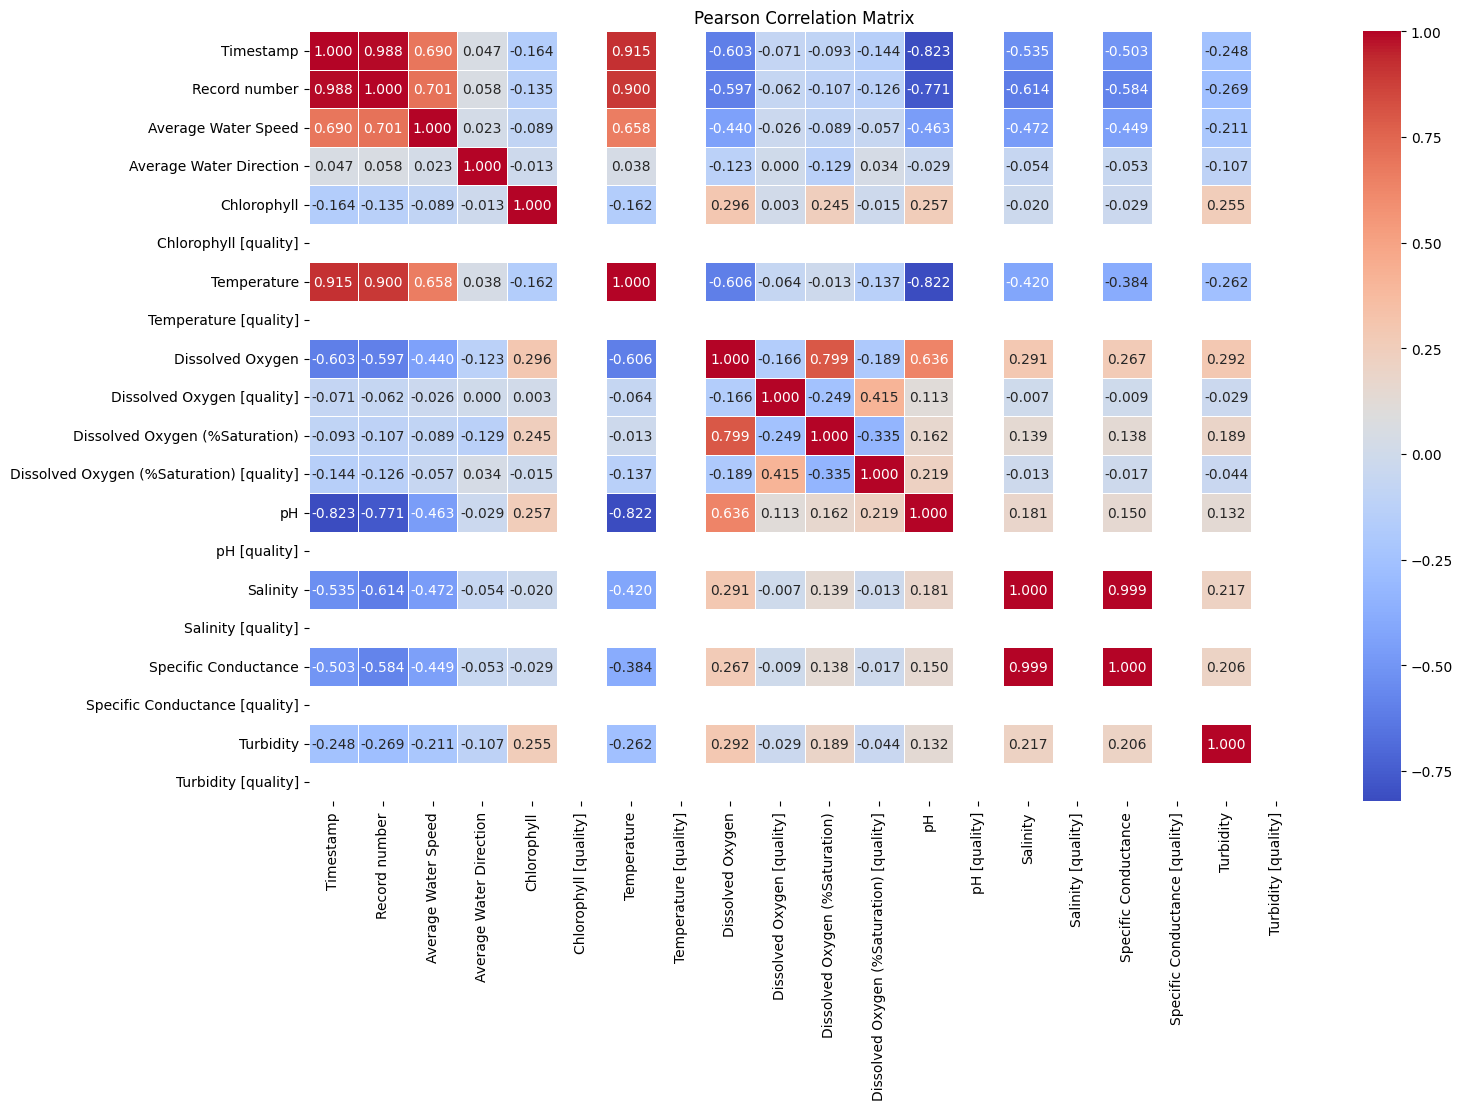

In [11]:
# Plotting Correlation Matrixplt.figure(figsize=(16,10))


plt.figure(figsize=(16,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5)
plt.title('Pearson Correlation Matrix')
plt.show()

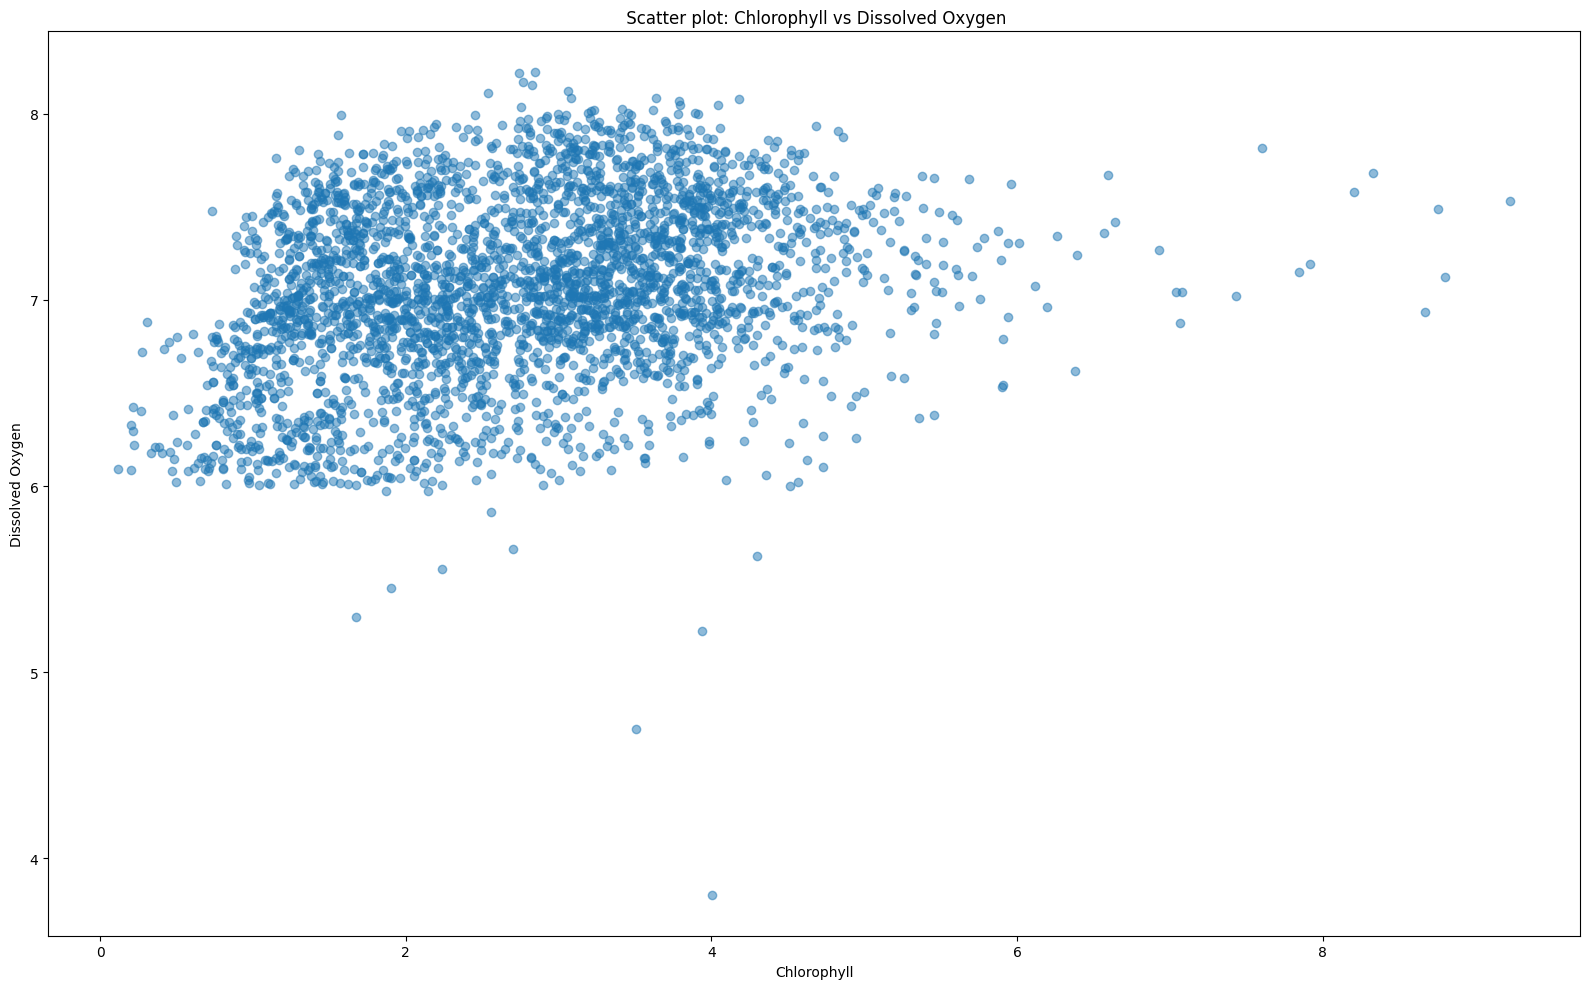

In [12]:
#set figure size for each individual plot
plt.figure(figsize=(16,10))
# Scatter plot: Chlorophyll vs Dissolved Oxygen
plt.scatter(df['Chlorophyll'],df['Dissolved Oxygen'],alpha=0.5)
plt.title(' Scatter plot: Chlorophyll vs Dissolved Oxygen')
plt.xlabel('Chlorophyll')
plt.ylabel('Dissolved Oxygen')
plt.tight_layout()
plt.show()

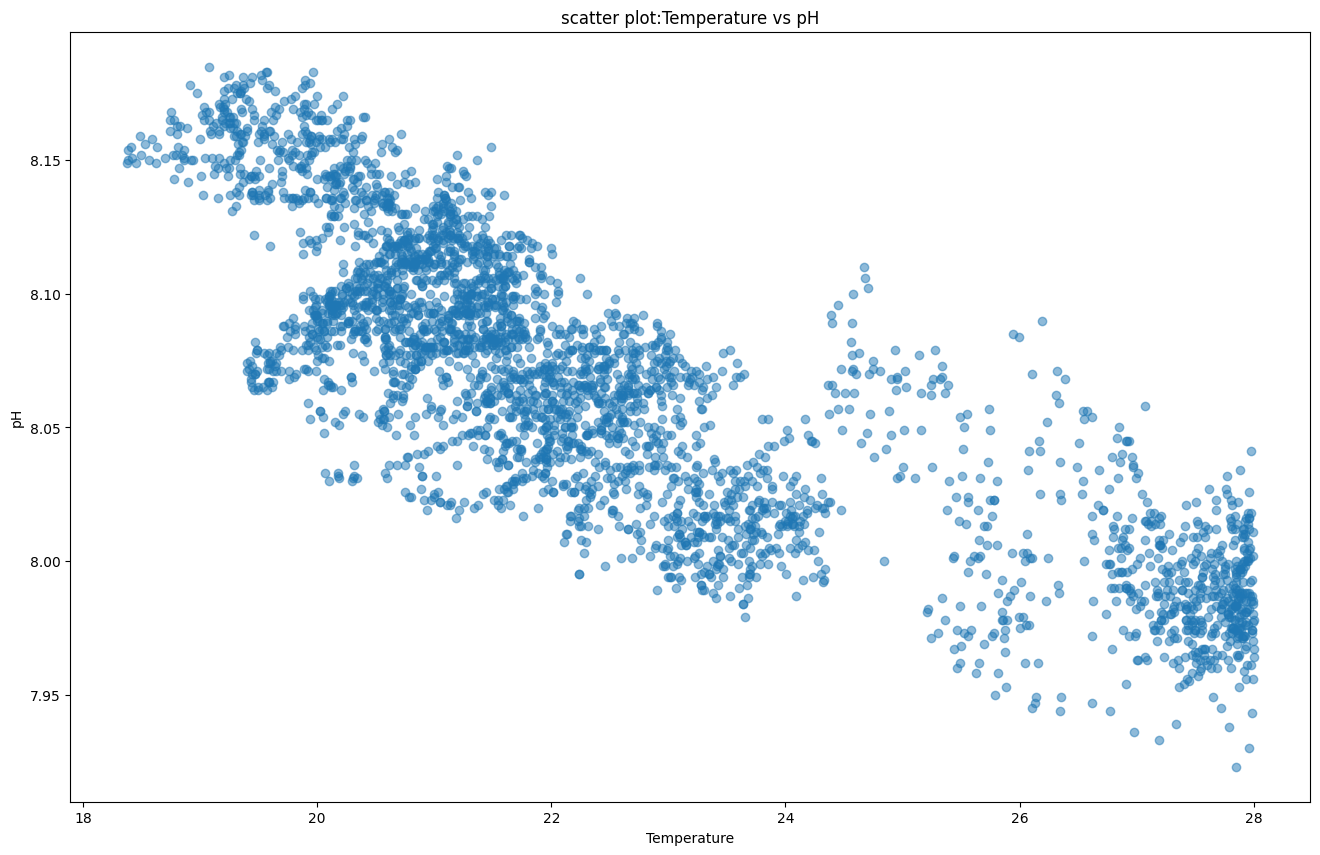

In [13]:
#set figure size for each individual plot
plt.figure(figsize=(16,10))
#scatter plot:Temperature vs pH
plt.scatter(df['Temperature'],df['pH'],alpha=0.5)
plt.title('scatter plot:Temperature vs pH')
plt.xlabel('Temperature')
plt.ylabel('pH')
plt.show()

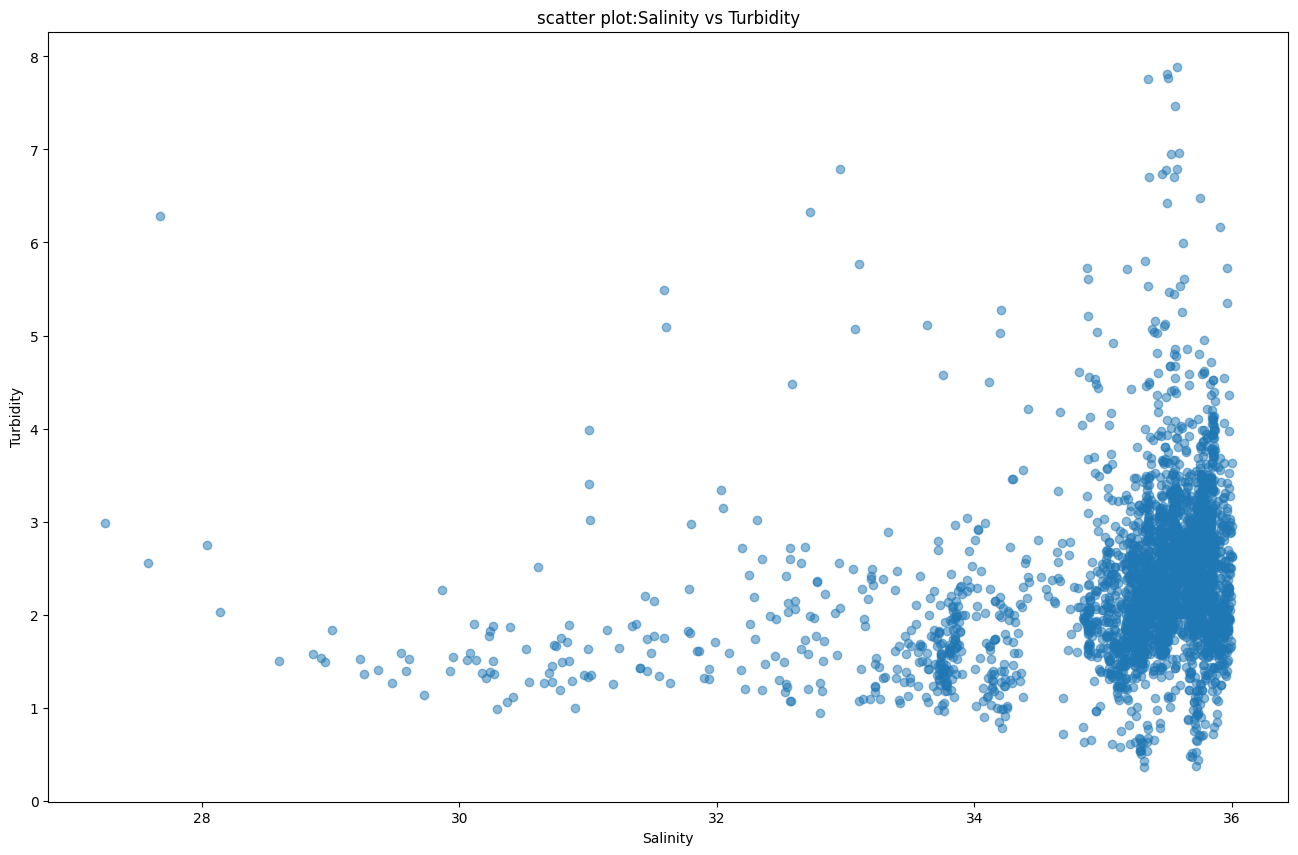

In [14]:
#set figure size for the finalplot
plt.figure(figsize=(16,10))
#scatter plot:Salinity vs Turbidity
plt.scatter(df['Salinity'],df['Turbidity'],alpha=0.5)
plt.title('scatter plot:Salinity vs Turbidity')
plt.xlabel('Salinity')
plt.ylabel('Turbidity')
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score,mean_squared_error

In [16]:
#drop column with Quality information
df=df.drop(columns=['Dissolved Oxygen[quality]','Chlorophyll[quality]','Chlorophyll[quality]',
                   'Disssolved Oxygen(%Saturation)[quality]','pH[quality]','Salinity[quality]',
                   'Specific Conductunce[quality]','Turbidity [quality]'], errors='ignore')

In [17]:
#filter rows for the 2023(Augest and December)
df_2023=df[(df['Timestamp'].dt.year==2023)&(df['Timestamp'].dt.month>=8)]

In [18]:
#selecting for variable prediction
x_columns=['Chlorophyll','Chlorophyll','Salinity']
y_columns='Dissolved Oxygen'

In [19]:
#impute missing values in 2023 data set
imputer=SimpleImputer(strategy='mean')
df_2023_imputed=imputer.fit_transform(df_2023[x_columns + [y_columns]])

In [20]:
#Extract x_train_imputed and y_train_imputed from impiuted data
x_train_imputed=df_2023_imputed[:,:-1]
y_train_imputed=df_2023_imputed[:,-1]

In [21]:
#initializing and filtering the modul
model=LinearRegression()
model.fit(x_train_imputed, y_train_imputed)

# Predicting values for 2023 based on selected variables (for validation)
prediction_2023=model.predict(x_train_imputed)

In [22]:
#calculate r2_score and mean squard error
r2=r2_score(df_2023[y_columns],prediction_2023)
mse=mean_squared_error(df_2023[y_columns],prediction_2023)

print(f'R^2 Score: {r2:.2f}')
print(f'Mean Squared Error: {mse:.2f}')

R^2 Score: 0.17
Mean Squared Error: 0.18


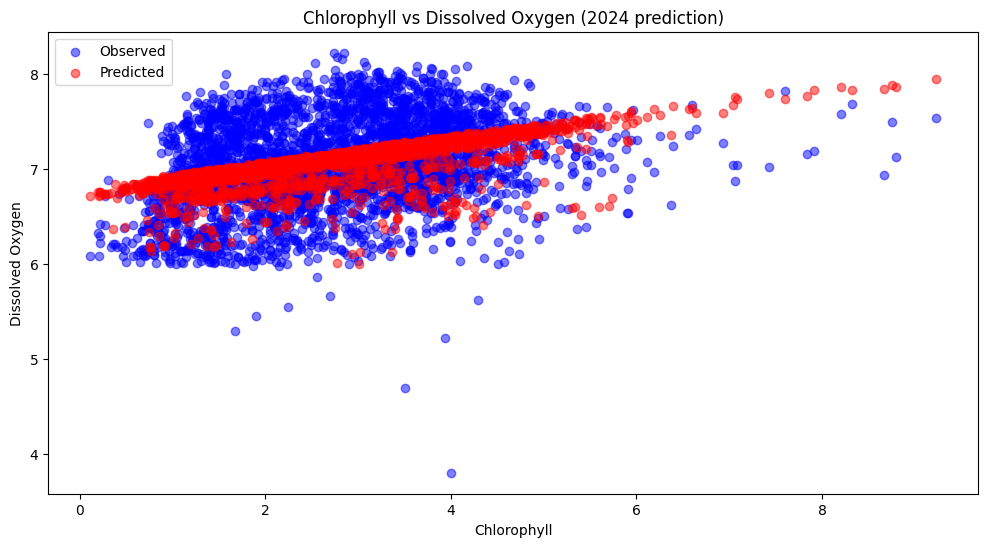

In [23]:
# Chlorophyll vs Dissolved Oxygen
plt.figure(figsize=(12, 6))
plt.scatter(df_2023['Chlorophyll'], df_2023['Dissolved Oxygen'], color='blue', label='Observed', alpha=0.5)
plt.scatter(df_2023['Chlorophyll'], prediction_2023, color='red', label='Predicted', alpha=0.5)
plt.title('Chlorophyll vs Dissolved Oxygen (2024 prediction)')
plt.xlabel('Chlorophyll')
plt.ylabel('Dissolved Oxygen')
plt.legend()

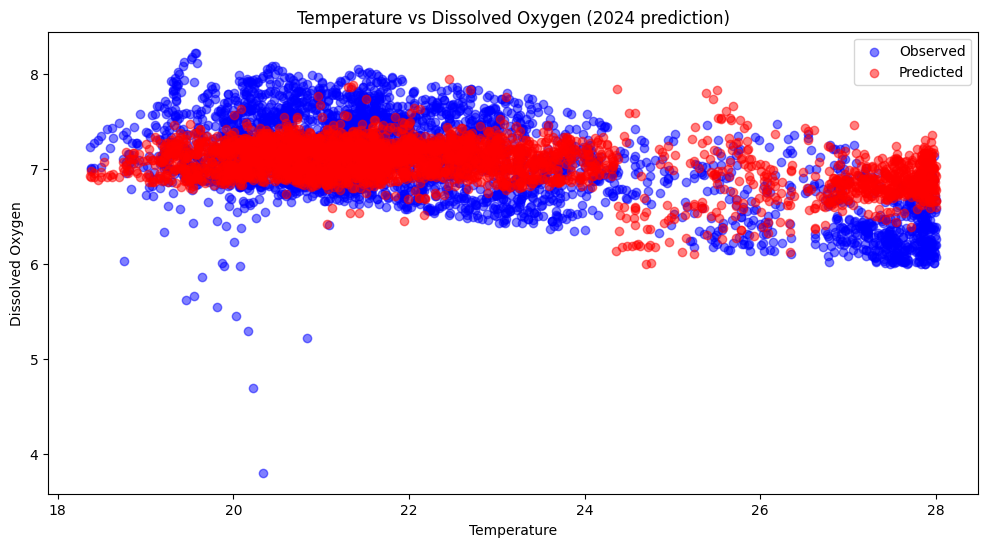

In [24]:
# Temperature vs Dissolved Oxygen
plt.figure(figsize=(12, 6))
plt.scatter(df_2023['Temperature'], df_2023['Dissolved Oxygen'], color='blue', label='Observed', alpha=0.5)
plt.scatter(df_2023['Temperature'], prediction_2023, color='red', label='Predicted', alpha=0.5)
plt.title('Temperature vs Dissolved Oxygen (2024 prediction)')
plt.xlabel('Temperature')
plt.ylabel('Dissolved Oxygen')
plt.legend()

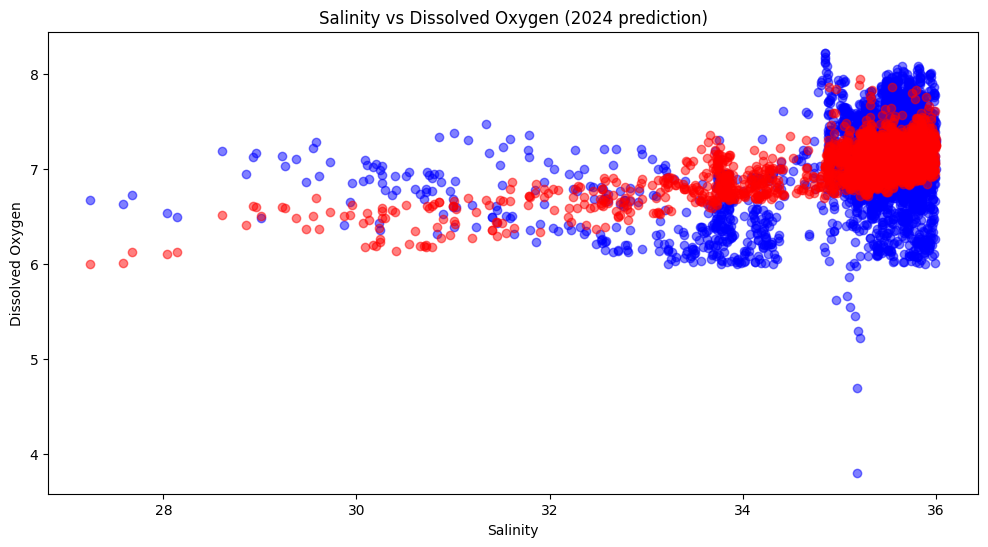

In [25]:
#Salinity vs Dissolved Oxygen
plt.figure(figsize=(12,6))
plt.scatter(df_2023['Salinity'],df_2023['Dissolved Oxygen'],color='blue',label='Observed',alpha=0.5)
plt.scatter(df_2023['Salinity'],prediction_2023,color='red',label='predicted',alpha=0.5)
plt.xlabel('Salinity')
plt.ylabel('Dissolved Oxygen')
plt.title('Salinity vs Dissolved Oxygen (2024 prediction)')
plt.show()